In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install yfinance
import yfinance as yf
from fbprophet import Prophet

     |████████████████████████████████| 63 kB 1.2 MB/s 
     |████████████████████████████████| 6.4 MB 11.1 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
data = yf.download("INTC",start="2016-01-01",end="2022-12-31")

[*********************100%***********************]  1 of 1 completed


In [ ]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,33.880001,34.009998,33.459999,33.990002,28.746809,27882200
2016-01-05,33.959999,34.000000,33.529999,33.830002,28.611490,16709500
2016-01-06,33.250000,33.520000,32.799999,33.080002,27.977186,25491300
2016-01-07,32.279999,33.009998,31.840000,31.840000,26.928465,37680500
2016-01-08,32.090000,32.220001,31.430000,31.510000,26.649364,29953800
...,...,...,...,...,...,...
2022-03-25,50.689999,51.980000,50.450001,51.830002,51.830002,33239800
2022-03-28,51.360001,51.570000,50.560001,51.509998,51.509998,22932400
2022-03-29,52.000000,52.290001,51.279999,52.250000,52.250000,27303700


In [ ]:
data = data.reset_index()
data[['ds','y']] = data[['Date','Close']]
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,ds,y
0,2016-01-04,33.880001,34.009998,33.459999,33.990002,28.746809,27882200,2016-01-04,33.990002
1,2016-01-05,33.959999,34.000000,33.529999,33.830002,28.611490,16709500,2016-01-05,33.830002
2,2016-01-06,33.250000,33.520000,32.799999,33.080002,27.977186,25491300,2016-01-06,33.080002
3,2016-01-07,32.279999,33.009998,31.840000,31.840000,26.928465,37680500,2016-01-07,31.840000
4,2016-01-08,32.090000,32.220001,31.430000,31.510000,26.649364,29953800,2016-01-08,31.510000


In [ ]:
model = Prophet()

In [ ]:
prophet_data = data.drop(['Date','Open','High','Low','Close','Adj Close','Volume'],axis=1)
prophet_data.head()

,ds,y
0,2016-01-04,33.990002
1,2016-01-05,33.830002
2,2016-01-06,33.080002
3,2016-01-07,31.840000
4,2016-01-08,31.510000


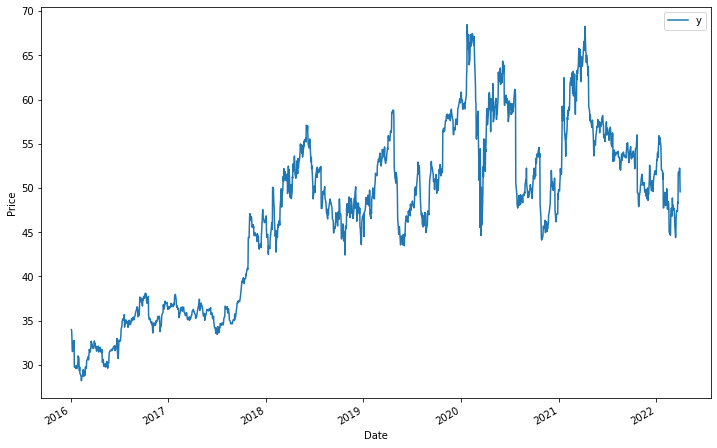

In [ ]:
ax = prophet_data.set_index('ds').plot(figsize=(12,8))
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

In [ ]:
model.fit(prophet_data)
yearly_sesonality=True

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = model.make_future_dataframe(periods=365)
future.tail()

,ds
1933,2023-03-27
1934,2023-03-28
1935,2023-03-29
1936,2023-03-30
1937,2023-03-31


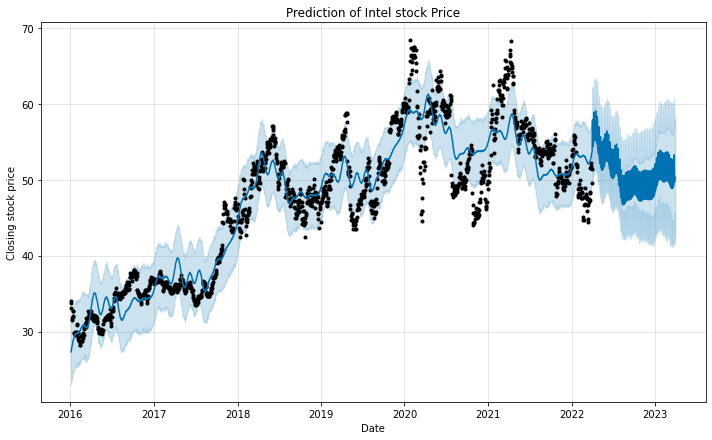

<bound method NDFrame.tail of              ds       yhat  yhat_lower  yhat_upper
0    2016-01-04  27.315317   23.019880   31.474777
1    2016-01-05  27.576749   23.402180   31.624467
2    2016-01-06  27.725288   23.629835   31.832794
3    2016-01-07  27.868008   23.612325   31.896766
4    2016-01-08  27.951820   23.736589   32.277399
...         ...        ...         ...         ...
1933 2023-03-27  49.661238   41.932268   57.051584
1934 2023-03-28  49.922368   41.555811   57.930073
1935 2023-03-29  50.077039   42.234058   57.748975
1936 2023-03-30  50.231510   42.384077   57.964455
1937 2023-03-31  50.331806   42.290518   58.225802

[1938 rows x 4 columns]>

In [ ]:
predictions = model.predict(future)
model.plot(predictions)
plt.title('Prediction of Intel stock Price')
plt.xlabel("Date")
plt.ylabel("Closing stock price")
plt.show()

predictions[['ds','yhat','yhat_lower','yhat_upper']].tail

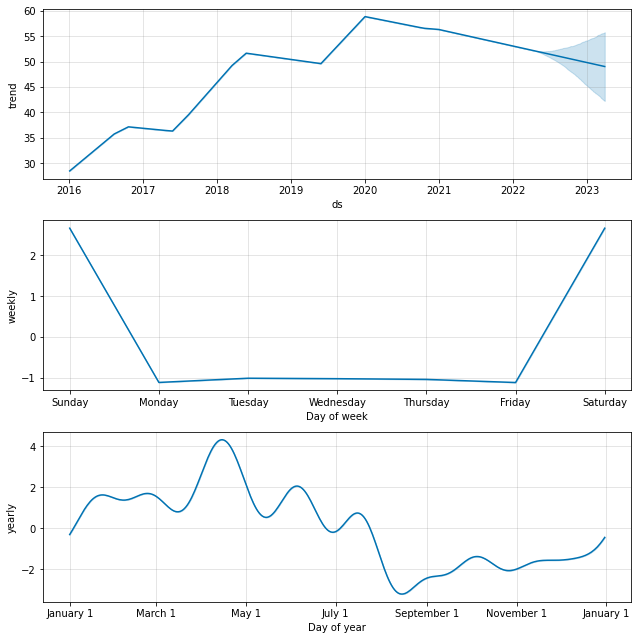

In [ ]:
model.plot_components(predictions)
plt.show()

In [ ]:
predictions[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1933,2023-03-27,49.661238,41.881312,57.361668
1934,2023-03-28,49.922368,41.540399,57.617793
1935,2023-03-29,50.077039,42.672222,57.595849
1936,2023-03-30,50.231510,42.234383,57.950342
1937,2023-03-31,50.331806,42.198567,58.355645
